In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("socioscop_anket.csv")
df.columns = ["TimeStamp","make_forms","education","contact_question", "country", "existing_functions","new_functions","average_time",
              "auto_completion","conditional_logic","statisctic_methods","simple_or_power", "explanations"]
df["existing_functions"] = df["existing_functions"].str.split(",")
df["statisctic_methods"] = df["statisctic_methods"].str.split(",")
def cond(s):
    if pd.isna(s):
        return np.nan
    if "Никакая" in s:
        return round(0, 3)
    if "Базовая" in s:
        return round(1/3, 3)
    if "Средняя" in s:
        return round(2/3, 3)
    if "Сложная" in s:
        return round(1, 3)
    #print("ответ", s)#Только Смотря какой опрос. Но хотелось бы, чтобы и средняя, и, в идеале, сложная логика могла быть воплощена в жизнь
    return round(2/3, 3)  #единственный "Другой" ответ - и он склоняется к средней логике

df["conditional_logic"] = df["conditional_logic"].apply(cond)

def  compl(s):
    if pd.isna(s): return np.nan
    if "Не затрудняет вовсе" in s: return round(0, 3)
    if "Скорее всего, не затрудняет" in s: return round(1/3,3)
    if "Слабо" in s: return round(2/3,3)
    if "Сильно" in s: return round(1,3)
    return np.nan
df["auto_completion"] = df["auto_completion"].apply(compl)

def s_or_p(s):
    if pd.isna(s): return np.nan
    return round((s-1)/9, 3)
df["simple_or_power"] = df["simple_or_power"].apply(s_or_p)
#df["conditional_logic"]

def av_t(s):
    if pd.isna(s): return np.nan
    if s == "Я не пишу, ведь это навредит респондентам": return "навредит"
    if s == "Я не пишу, поскольку это не имеет смысла": return "не имеет смысла"
    if s == "Я никогда не думал(-а) об этом": return "не думал"
    if s == "Я не пишу: это полезно, но сложно": return "не указываю, полезно, сложно"
    if s == "Я указываю качественно, но трачу на это много сил": return "указываю, полезно, сложно"
    if s == "Я легко и точно узнаю, что писать, благодаря ручной автоматизации": return "указываю, легко"
    if s == "А что если собирать данные о времени прохождения пользователями опроса и их усреднять и указывать? Было бы классно.": return "усреднять"
    if s == "Никогда не писала, поскольку не было надобности, но если бы такая ситуация возникла, я бы писала честно, пробуя проходить опрос сама и округляя значения времени вверх":
        return "не было надобности"
    if s == "Всегда указываю, респондент должен понимать сколько времени займёт опрос": return "указываю"
    return np.nan

df["average_time"] = df["average_time"].apply(av_t)

def expl(s):
    if pd.isna(s): return np.nan
    if s == "Нет, я считаю это излишним в таком приложении": return "излишне"
    if  s == "Мне всё равно – и так знаю, как методы работают": return "всё равно"
    if s == "Я бы хотел(-а) – тогда я, возможно, смогу понять, что лучше использовать": return "нужно"
    if s == "Мне кажется, что это должно быть обязательной функцией": return "обязательно"

df["explanations"] = df["explanations"].apply(expl)

def ex_f(arr):
    new_arr = []
    try:
        for s in arr:
            if "Возможность совместной работы над созданием опросов" in s:
                new_arr.append("Совместный редактор")
                continue
            if "Автоматическое отображение текущей статистики ответов" in s: 
                new_arr.append("Автомат отобр статистики")
                continue
            if "Возможность задавать случайный порядок отображения вопросов" in s:
                new_arr.append("Случайный порядок вопросов")
                continue
            if "Возможность кастомизировать дизайн опроса" in s:
                new_arr.append("Кастомизация дизайна")
                continue
            if "Возможность настраивать ветвления вопросов" in s:
                new_arr.append("Настраиваемое ветвление")
                continue
            if "Наличие надёжной защиты и конфиденциальности данных" in s:
                new_arr.append("Защита и конфиденциальность данных")
                continue
            if "Автосохранение ответов у респондента" in s: 
                new_arr.append("Автосохранение ответов")
                continue
            if "Экспорт данных в различных удобных форматах" in s:
                new_arr.append("Экспорт данных")
                continue
            if "Возможность ограничивать количество выбранных ответов в check box" in s:
                new_arr.append("Ограниченный выбор в checkbox")
                continue
            if "Наличие шаблонов для анкет" in s:
                new_arr.append("Шаблоны анкет")
                continue
            print(s);new_arr.append(s)
    except:return []
    return list(set(new_arr))

df["existing_functions"] = df["existing_functions"].apply(ex_f)
df.sample(10)#["existing_functions"]
                           

,TimeStamp,make_forms,education,contact_question,country,existing_functions,new_functions,average_time,auto_completion,conditional_logic,statisctic_methods,simple_or_power,explanations
31,2025-11-15 22:54:36.716,Да,Среднее общее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Отечественного,"[Кастомизация дизайна, Автосохранение ответов,...",NaN,не думал,1.000,0.333,"[Дисперсия, Наиболее встречаемое значение (мо...",1.000,нужно
18,2025-11-14 23:11:13.991,Нет,Высшее образование,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2025-11-13 08:35:19.133,Да,Высшее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Зарубежного,"[Совместный редактор, Экспорт данных, Автосохр...",NaN,NaN,0.667,1.000,"[Корреляция между ответами на разные вопросы, ...",0.556,нужно
6,2025-11-12 08:45:58.598,Да,Высшее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Отечественного,"[Экспорт данных, Автосохранение ответов, Защит...",Затрудняюсь ответить,"не указываю, полезно, сложно",0.333,0.333,"[Гистограммы, Круговые диаграммы]",0.556,обязательно
32,2025-11-15 22:59:07.242,Нет,Основное общее образование,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2025-11-16 18:52:11.151,Нет,Высшее образование,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2025-11-14 19:50:26.224,Да,Среднее общее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Отечественного,"[Ограниченный выбор в checkbox, Автосохранение...",NaN,NaN,0.667,0.667,"[Среднее арифметическое, Гистограммы, Наибол...",0.667,нужно
29,2025-11-15 22:41:51.374,Да,Высшее образование,"Иногда, изменяя какие-то вопросы для лучшего в...",Затрудняюсь ответить,"[Экспорт данных, Ограниченный выбор в checkbox...",NaN,не имеет смысла,1.000,0.667,"[Корреляция между ответами на разные вопросы, ...",0.444,нужно
0,2025-11-10 11:18:33.729,Да,Высшее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Зарубежного,"[Совместный редактор, Экспорт данных, Настраив...",Авторассчет среднего времени прохождения опроса,"не указываю, полезно, сложно",0.667,0.667,"[Круговые диаграммы, Точечные графики, Средн...",0.667,всё равно
56,2025-11-17 01:38:53.396,Да,Высшее образование,"Да, я разрабатываю всю анкету, ориентируясь на...",Отечественного,"[Экспорт данных, Автосохранение ответов, Касто...",-,не имеет смысла,0.667,0.667,"[Среднее арифметическое, Гистограммы, Наибол...",0.556,всё равно


In [165]:
df_national_or_unknown = df[ (df["country"].str.contains("Отечественного")) | (df["country"]== "Затрудняюсь ответить")]
columns_to_keep = [col for col in df.columns if col in ['education', 'country', "existing_functions", "new_functions", "average_time", "auto_completion", "conditional_logic", "explanations"]]
df_national = df[ df["country"].str.contains("Отечественного", na=False)]
df_unknown = df[df["country"]== "Затрудняюсь ответить"]
#df_national
df_national_or_unknown[columns_to_keep].head()

,education,country,existing_functions,new_functions,average_time,auto_completion,conditional_logic,explanations
1,Высшее образование,Затрудняюсь ответить,"[Экспорт данных, Автомат отобр статистики, Огр...",Затрудняюсь ответить,NaN,0.333,0.667,нужно
2,Высшее образование,Отечественного,[Защита и конфиденциальность данных],Не знаю,не думал,1.000,0.000,излишне
3,Высшее образование,Отечественного,"[Кастомизация дизайна, Экспорт данных, Автосох...",NaN,"не указываю, полезно, сложно",0.333,0.333,обязательно
6,Высшее образование,Отечественного,"[Экспорт данных, Автосохранение ответов, Защит...",Затрудняюсь ответить,"не указываю, полезно, сложно",0.333,0.333,обязательно
9,Высшее образование,Отечественного,"[Экспорт данных, Автосохранение ответов, Касто...",NaN,"указываю, полезно, сложно",1.000,0.667,обязательно


In [166]:
print("Средняя надобность в автозаполнении для тех, кто  пользуется российским ПО или затрудняется ответить", round(df_national_or_unknown["auto_completion"].mean(),3))
print("Средняя надобность в автозаполнении для тех, кто  пользуется российским ПО", round(df_national["auto_completion"].mean(),3))
print("Средняя надобность в автозаполнении для тех, кто  затрудняется ответить", round(df_unknown["auto_completion"].mean(),3))
print()

print("Сложность логики ветвления для тех, кто  пользуется российским ПО или затрудняется ответить", round(df_national_or_unknown["conditional_logic"].mean(), 3))
print("Сложность логики ветвления для тех, кто  пользуется российским ПО или затрудняется ответить", round(df_national["conditional_logic"].mean(), 3))
print("Сложность логики ветвления для тех, кто  затрудняется ответить", round(df_unknown["conditional_logic"].mean(), 3))
print()

print("Объяснение статистических терминов для тех, кто  пользуется российским ПО или затрудняется ответить\n" , df_national_or_unknown["explanations"].value_counts().sort_index())
print()
print("Объяснение статистических терминов для тех, кто  пользуется российским ПО\n" , df_national["explanations"].value_counts().sort_index())
print()
print("Объяснение статистических терминов для тех, кто затрудняется ответить\n" , df_unknown["explanations"].value_counts().sort_index())
print("=====================================")
both_ex_func = df_national_or_unknown["existing_functions"].explode().value_counts().sort_index()
national_ex_func = df_national["existing_functions"].explode().value_counts().sort_index()
unknown_ex_func = df_unknown["existing_functions"].explode().value_counts().sort_index()

both_av_t = df_national_or_unknown["average_time"].explode().value_counts().sort_index()
national_av_t = df_national["average_time"].explode().value_counts().sort_index()
unknown_av_t = df_unknown["average_time"].explode().value_counts().sort_index()

both_compl = df_national_or_unknown["auto_completion"].explode().value_counts().sort_index()
national_compl = df_national["auto_completion"].explode().value_counts().sort_index()
unknown_compl = df_unknown["auto_completion"].explode().value_counts().sort_index()

both_cond = df_national_or_unknown["conditional_logic"].explode().value_counts().sort_index()
national_cond = df_national["conditional_logic"].explode().value_counts().sort_index()
unknown_cond = df_unknown["conditional_logic"].explode().value_counts().sort_index()
# print()
# print("Существующие функции для тех, кто  пользуется российским ПО или затрудняется ответить\n" , both_ex_func)
# print()
# print("Существующие функции терминов для тех, кто  пользуется российским ПО\n" , national_ex_func)
# print()
# print("Существующие функции терминов для тех, кто затрудняется ответить\n" , unknown_ex_func)
print("Функции, которые ещё не встречали, но были бы полезны")
print("пользователи российского ПО или те, кто затрудняется ответить\n",df_national_or_unknown["new_functions"].dropna() )
print()
print("пользователи российского ПО\n", df_national["new_functions"].dropna() )
print()
print("те, кто затрудняются ответить\n", df_unknown["new_functions"].dropna() )
print("=====================================")

Средняя надобность в автозаполнении для тех, кто  пользуется российским ПО или затрудняется ответить 0.71
Средняя надобность в автозаполнении для тех, кто  пользуется российским ПО 0.733
Средняя надобность в автозаполнении для тех, кто  затрудняется ответить 0.667

Сложность логики ветвления для тех, кто  пользуется российским ПО или затрудняется ответить 0.449
Сложность логики ветвления для тех, кто  пользуется российским ПО или затрудняется ответить 0.467
Сложность логики ветвления для тех, кто  затрудняется ответить 0.417

Объяснение статистических терминов для тех, кто  пользуется российским ПО или затрудняется ответить
 explanations
всё равно       1
излишне         1
нужно          12
обязательно     8
Name: count, dtype: int64

Объяснение статистических терминов для тех, кто  пользуется российским ПО
 explanations
всё равно      1
излишне        1
нужно          6
обязательно    6
Name: count, dtype: int64

Объяснение статистических терминов для тех, кто затрудняется ответить
 e

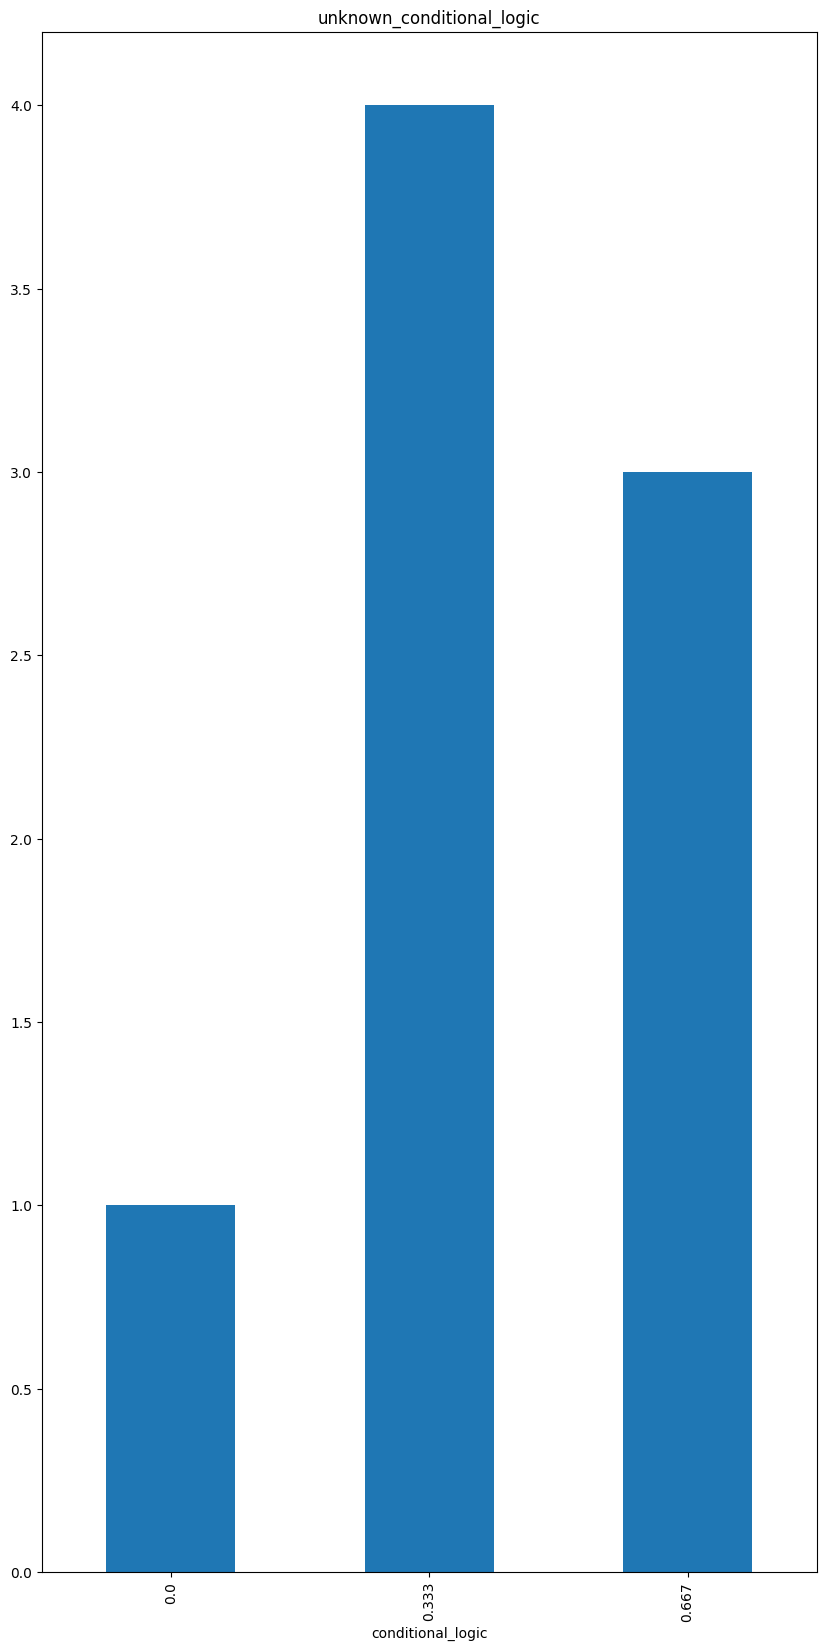

In [169]:
plt.figure(figsize=(10, 20))

# national_ex_func.plot(kind="bar")
# plt.title("national_existing_functions")
# plt.savefig("national_existing_functions_distr")

# unknown_ex_func.plot(kind="bar")
# plt.savefig("unknown_existing_functions_distr")
# plt.title("unknown_existing_functions")

# both_ex_func.plot(kind="bar")
# plt.savefig("both_existing_functions_distr")
# plt.title("both_existing_functions")


# national_av_t.plot(kind = "bar")
# plt.title("national_average_time")
# plt.savefig("national_average_time_distr")

# unknown_av_t.plot(kind = "bar")
# plt.title("unknown_average_time")
# plt.savefig("unknown_average_time_distr")

# both_av_t.plot(kind = "bar")
# plt.title("both_average_time")
# plt.savefig("both_average_time_distr")


# both_compl.plot(kind = "bar")
# plt.title("both_auto_completion")
# plt.savefig("both_auto_completation_distr")

# national_compl.plot(kind = "bar")
# plt.title("national_auto_completion")
# plt.savefig("national_auto_completation_distr")

# unknown_compl.plot(kind = "bar")
# plt.title("unknown_auto_completion")
# plt.savefig("unknown_auto_completation_distr")


# both_cond.plot(kind = "bar")
# plt.title("both_conditional_logic")
# plt.savefig("both_conditional_logic_distr")

# national_cond.plot(kind = "bar")
# plt.title("national_conditional_logic")
# plt.savefig("national_conditional_logic_distr")

unknown_cond.plot(kind = "bar")
plt.title("unknown_conditional_logic")
plt.savefig("unknown_conditional_logic_distr")